<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load the customer tip dataset and print the first five observations

In [2]:
# type your code here
df_tip=pd.read_csv('customer_tip.csv')
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Make a list of categorical and numerical variables in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
val=df_tip.select_dtypes(include=np.number)
print('Numerical Columns:',val.columns)

val=df_tip.select_dtypes(exclude=np.number)
print('Categorical Columns:',val.columns)





Numerical Columns: Index(['total_bill', 'tip', 'size'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'day', 'time'], dtype='object')


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Compute the average bill amount for each day
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
average_bill_by_day=df_tip.groupby('day')['tip'].mean()
print(average_bill_by_day)


day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Which gender is more generous in giving the tip?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
average_tip_by_gender=df_tip.groupby('sex')['tip'].mean()
print(average_tip_by_gender)

more_generous=average_tip_by_gender.sort_values(ascending=False).head(1)
more_generous


sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


sex
Male    3.089618
Name: tip, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. According to the data, were there more customers for dinner or lunch? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
val=df_tip['time'].value_counts()
more_people=val.sort_values(ascending=False).head(1)

print(more_people)



time
Dinner    176
Name: count, dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Based on the statistical summary, comment on the variable 'tip'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
tip_summary=df_tip['tip'].describe()
print(tip_summary)


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the busiest day in terms of the orders
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
df_tip['day'].value_counts().sort_values(ascending=False).head(1)


day
Sat    87
Name: count, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

1.1332130376158205
Positively Skewed


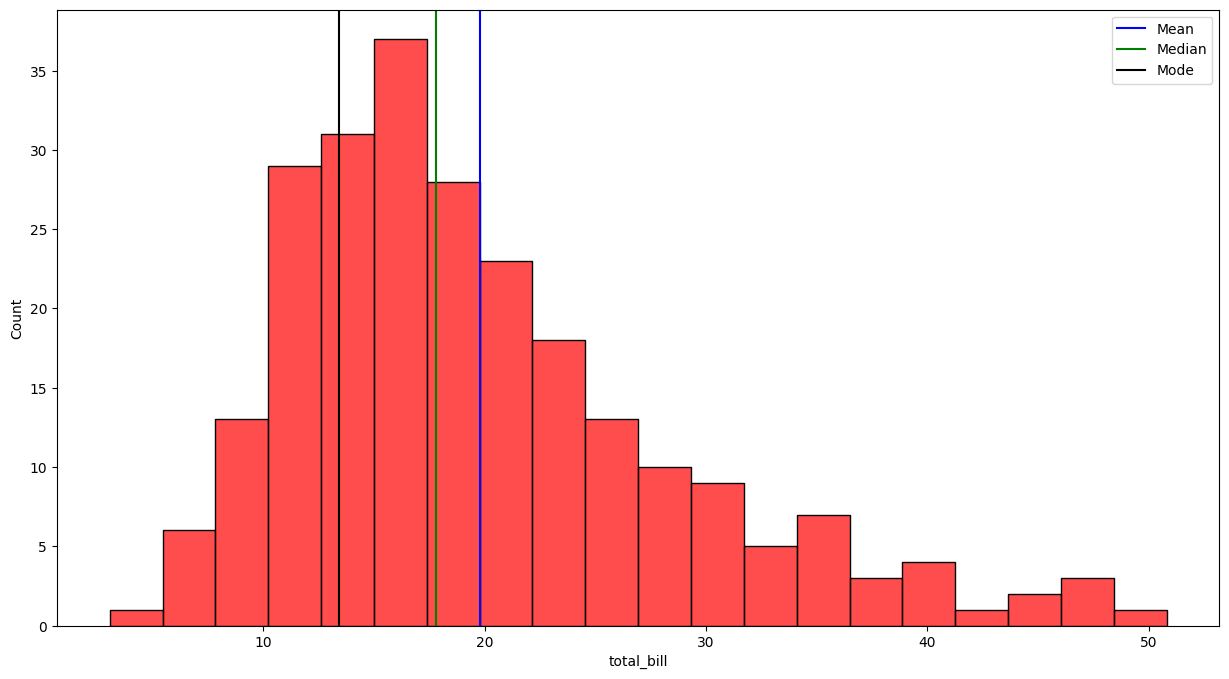

In [42]:
# type your code here
skewness=df_tip['total_bill'].skew()
print(skewness)
if skewness>0:
    print('Positively Skewed')
else:
    print('Negatively Skewed')

plt.figure(figsize=(15,8))
sns.histplot(df_tip['total_bill'],color='red',alpha=0.7,bins=20)
plt.axvline(df_tip['total_bill'].mean(),color='blue',label='Mean')
plt.axvline(df_tip['total_bill'].median(),color='green',label='Median')
plt.axvline(df_tip['total_bill'].mode()[0],color='black',label='Mode')
plt.legend()
plt.show()



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Is the tip amount dependent on the total bill?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here
val=df_tip['tip'].corr(df_tip['total_bill'])
if val>0:
    print('Strongly Dependent')
else:
    print('Weak Co relation')


Strongly Dependent


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  What is the value under which 20% of the total bill would lie?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
percent_20=df_tip['total_bill'].quantile(0.20)
print(percent_20)

12.636


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Retrieve the orders where the bill amount is more than 2 standard deviation away from the average bill </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# type your code here
average_bill=df_tip['total_bill'].mean()
std_bill=df_tip['total_bill'].std()
lower_bound=average_bill-2*std_bill
upper_bound=average_bill+2*std_bill

outliners=df_tip[(df_tip['total_bill']<lower_bound)|(df_tip['total_bill']>upper_bound)]
print(outliners)


     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
56        38.01   3.00    Male    Yes   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
95        40.17   4.73    Male    Yes   Fri  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
112       38.07   4.00    Male     No   Sun  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
207       38.73   3.00    Male    Yes   Sat  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
